In [12]:
import pandas as pd
import joblib
import shap

# Load processed data
df = pd.read_csv("../data/processed/account_features.csv")

# Separate features & target
X = df.drop(columns=["account_id", "churn_flag"])
y = df["churn_flag"]

# Load trained model
model = joblib.load("../models/churn_model.pkl")


In [13]:
# Ensure all features are numeric floats (SHAP requirement)
X_shap = X.astype(float)


In [14]:
explainer = shap.Explainer(model, X_shap)
shap_values = explainer(X_shap)

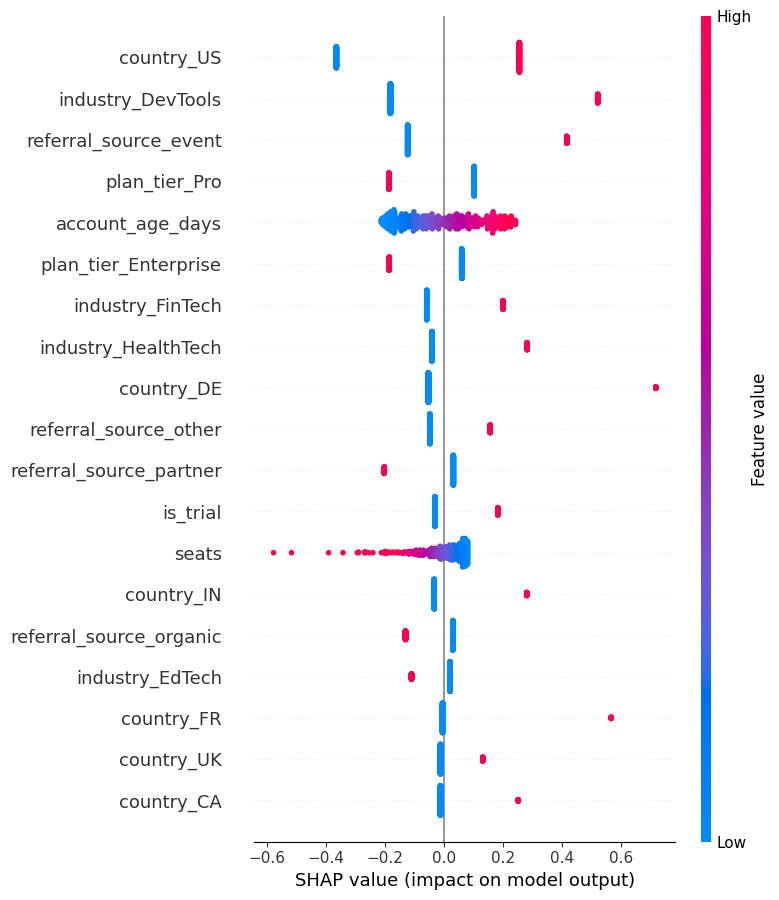

In [15]:
shap.summary_plot(shap_values.values, X_shap)


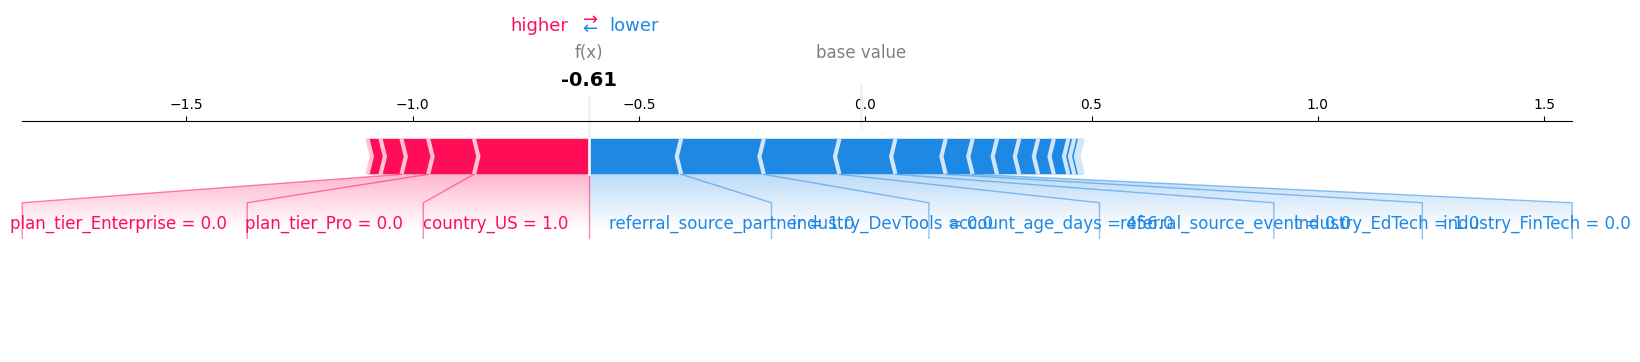

In [16]:
idx = 0

shap.force_plot(
    shap_values.base_values[idx],
    shap_values.values[idx],
    X_shap.iloc[idx],
    matplotlib=True
)


In [17]:
def explain_customer(idx):
    row = X_shap.iloc[idx]
    shap_row = shap_values.values[idx]

    explanation = pd.DataFrame({
        "feature": row.index,
        "value": row.values,
        "impact": shap_row
    }).sort_values(by="impact", ascending=False)

    return explanation.head(5)


In [18]:
explain_customer(0)


,feature,value,impact
12,country_US,1.0,0.254202
18,plan_tier_Pro,0.0,0.101225
17,plan_tier_Enterprise,0.0,0.059015
0,seats,9.0,0.046269
14,referral_source_organic,0.0,0.028846
